In [ ]:
import xml.etree.ElementTree as ET
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = {}
markers = ['RASIS', 'LASIS', 'RPSIS', 'LPSIS', 'RTH1', 'RTH2', 'RTH3', 'RTH4', 'RFLE', 'RFAL', 'RSK1', 'RSK2', 'RSK4', 'RSK3', 'RFCC', 'RFMT1', 'RFMT2', 'RFMT5', 'LTH1', 'LTH2', 'LTH3', 'LTH4', 'LFLE', 'LSK1', 'LSK2', 'LSK4', 'LSK3', 'LFAL', 'LFCC', 'LFMT1', 'LFMT2', 'LFMT5']

In [ ]:

def extract_ik_weights(ik, markers = markers):

    info = {}
    # Print the full structure
    for file in ik:
        a=0
        b=0
        weight = {}
        tree = ET.parse(file)
        root = tree.getroot()
        while root[0][b].tag != 'IKTaskSet':
            b+=1
        while True:                
            try:
                if (root[0][b][0][a].attrib)["name"] in markers:
                    weight[(root[0][b][0][a].attrib)["name"]] = {root[0][b][0][a][1].tag:root[0][b][0][a][1].text,
                                                                        root[0][b][0][a][0].tag:root[0][b][0][a][0].text}
                a+=1
            except IndexError:
                break
            
        info[Path(file).name] = weight
    return info

In [ ]:

def plot_ik_weights_heatmap(info,subject):
    # 1. Transform your dictionary into a long-form DataFrame
    rows = []
    for trial, markers in info.items():
        trial_id = trial.replace('.xml', '').replace('ik_setup_', '')
        for marker, details in markers.items():
            rows.append({
                'Trial': trial_id,
                'Marker': marker,
                'Weight': float(details['weight'])
            })

    df = pd.DataFrame(rows)

    # 2. Pivot for the Heatmap
    pivot_df = df.pivot(index='Marker', columns='Trial', values='Weight')
    # pivot_df = pivot_df[['STW1', 'STW2', 'STW3', 'STW4', 'STW5']] # Ensure order

    # 3. Plotting the Heatmap
    plt.figure(figsize=(10, 12))
    sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Weight'})
    plt.title('Distribution of Marker Weights across IK Trials')
    plt.savefig(f'marker_weights_heatmaps{subject}.png')

    # 4. Plotting a Comparison for Key Markers
    # key_markers = ['RASIS', 'RPSIS', 'RTH1', 'RFLE', 'RFCC']
    # subset_df = df[df['Marker'].isin(key_markers)]

    # plt.figure(figsize=(10, 6))
    # sns.barplot(data=subset_df, x='Marker', y='Weight', hue='Trial')
    # plt.title('Comparison of Specific Marker Weights')
    # plt.ylabel('Weight Value')
    # plt.savefig('key_markers_weights_bar_s02.png')

In [ ]:

def plot_ik_weights_comparison(data):
    # Assuming 'data' contains subjects as top-level keys
    # Example format: {'Subject_01': {...}, 'Subject_02': {...}}

    rows = []
    for subject, setups in data.items():
        for setup_name, markers in setups.items():
            for marker, details in markers.items():
                rows.append({
                    'Subject': subject,
                    'Marker': marker,
                    'Weight': float(details['weight'])
                })

    df_comp = pd.DataFrame(rows)

    # Create a Box Plot to see the variance per marker across all subjects
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_comp, x='Marker', y='Weight', palette='Set3')
    sns.stripplot(data=df_comp, x='Marker', y='Weight', color='black', alpha=0.3) # Show individual points
    plt.xticks(rotation=45)
    plt.title('Comparison of Marker Weights Across All Subjects')
    plt.ylabel('Weight Value')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig('marker_weights_comparison_all_subjects.png')
    plt.show()

In [ ]:

for subject in range(2,11):
    ik = [rf"d:\UG_Proj\Human Sitting to Walking Transitions\S{subject:02d}\IK\ik_setup_stw{trial}.xml" for trial in range(1,6)]
    info = extract_ik_weights(ik)
    # plot_ik_weights_heatmap(info,subject)
    data[f'Subject_{subject:02d}'] = info
    
    

In [ ]:
data.keys()

In [ ]:
plot_ik_weights_comparison(data)

In [ ]:
data["Subject_07"]["ik_setup_stw1.xml"]

In [ ]:
import opensim as osim
import os

In [ ]:
os.chdir(r"d:\UG_Proj\Human Sitting to Walking Transitions\S02")

In [ ]:
iktool = osim.InverseKinematicsTool(r"d:\UG_Proj\Human Sitting to Walking Transitions\S02\IK\ik_setup_STW1.xml")

In [ ]:
iktool.get_marker_file()

In [ ]:
iktool.run()

In [ ]:
from opensim import InverseKinematicsTool, Model
import os


os.chdir(r"d:\UG_Proj\Human Sitting to Walking Transitions\S02\IK") #already present
# Check current working directory
print(f"Current working directory: {os.getcwd()}")

# Load IK setup
ik_setup = "d:\\UG_Proj\\Human Sitting to Walking Transitions\\S02\\IK\\ik_setup_STW1.xml"
ik_tool = InverseKinematicsTool(ik_setup)

# Get the model file path it's using
model_file = ik_tool.get_model_file()
print(f"Model file (relative): {model_file}")

# Resolve to absolute path
abs_model_path = os.path.abspath(model_file)
print(f"Model file (absolute): {abs_model_path}")

# Check if file exists
if os.path.exists(abs_model_path):
    print(f"✓ File found: {abs_model_path}")
else:
    print(f"✗ File NOT found: {abs_model_path}")

# Run IK
# ik_tool.run()

In [3]:
print("IK process completed.")

IK process completed.


In [ ]:
import opensim as osm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Setup Paths and Model ---
model_path = r'd:\UG_Proj\Human Sitting to Walking Transitions\S01\scale\subject01_simbody_scaled.osim'
ik_file = r'd:\UG_Proj\Human Sitting to Walking Transitions\S01\IK\results_stw\ik_output_s01_stw1.mot' # Replace with your IK file name
output_dir = './analysis_results'

model = osm.Model(model_path)
model.initSystem()

# --- 2. Define Point Kinematics Analysis ---
# We assume the RLCC and LLCC are the markers you want to track.
# If they are not in the model, we use the center of the calcaneus bodies.
bodies_to_analyze = ['calcn_r', 'calcn_l']
marker_names = ['RFCC', 'LFCC']

# Create the PointKinematics analysis
pk = osm.PointKinematics(model)
pk.setStartTime(0) # Adjust based on your IK data start time
pk.setEndTime(5)  # Adjust based on your IK data end time

# For each marker, we define its body and local position
# Here we use 0,0,0 as the local origin of the calcaneus bodies
for (body_name,marker_name) in (bodies_to_analyze,marker_names):
    pk.setBody(model.getBodySet().get(body_name))
    pk.setPoint(osm.Vec3(0, 0, 0)) # Point in local body frame
    pk.setPointName(marker_name)

model.addAnalysis(pk)

# --- 3. Run Analysis Tool ---
analyze = osm.AnalyzeTool()
analyze.setModel(model)
analyze.setStatesFileName(ik_file)
analyze.setResultsDir(output_dir)
analyze.run()

print("Point Acceleration analysis complete. Files saved in:", output_dir)

['Frame#', 'Time', 'RASIS', '', '', 'LASIS', '', '', 'RPSIS', '', '', 'LPSIS', '', '', 'RTH1', '', '', 'RTH2', '', '', 'RTH3', '', '', 'RTH4', '', '', 'RFLE', '', '', 'LTH1', '', '', 'LTH2', '', '', 'LTH3', '', '', 'LTH4', '', '', 'LFLE', '', '', 'RSK1', '', '', 'RSK2', '', '', 'RSK3', '', '', 'RSK4', '', '', 'RFAL', '', '', 'LSK1', '', '', 'LSK2', '', '', 'LSK3', '', '', 'LSK4', '', '', 'LFAL', '', '', 'RFCC', '', '', 'RFMT1', '', '', 'RFMT2', '', '', 'RFMT5', '', '', 'LFCC', '', '', 'LFMT1', '', '', 'LFMT2', '', '', 'LFMT5', '', '', '\n']
The Left (LFCC) leg starts moving first at 4.485s


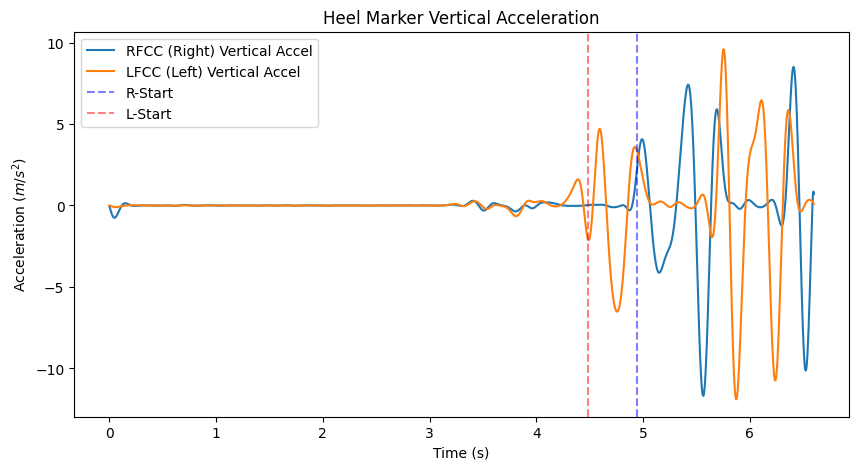

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def calculate_marker_acceleration(trc_path, output_csv='marker_accelerations.csv', cutoff_freq=6.0):
    # 1. Load TRC file
    # We read the headers carefully to find RFCC and LFCC
    with open(trc_path, 'r') as f:
        lines = f.readlines()
    
    # Marker names are usually on line 3, components (X, Y, Z) on line 4
    marker_names = lines[3].split('\t')
    print(marker_names)
    
    # Find the column index for RFCC and LFCC
    # TRC format: Frame (0), Time (1), M1_X (2), M1_Y (3), M1_Z (4)...
    rfcc_idx = -1
    lfcc_idx = -1
    
    current_col = 2
    for m in marker_names:
        m = m.strip()
        if m == 'RFCC': rfcc_idx = current_col
        if m == 'LFCC': lfcc_idx = current_col
        if m: current_col += 3 # Each marker has 3 columns (X, Y, Z)

    if rfcc_idx == -1 or lfcc_idx == -1:
        raise ValueError("RFCC or LFCC markers not found in the TRC file.")

    # 2. Load the numerical data
    data = pd.read_csv(trc_path, sep='\t', skiprows=5, header=None)
    time = data.iloc[:, 1].values
    fs = 1.0 / np.mean(np.diff(time)) # Sampling frequency
    
    # Extract X, Y, Z for both markers
    rfcc_pos = data.iloc[:, rfcc_idx:rfcc_idx+3].values
    lfcc_pos = data.iloc[:, lfcc_idx:lfcc_idx+3].values

    # 3. Filter the Position Data (Butterworth Low-pass)
    # This is mandatory; differentiating raw noise creates huge errors.
    b, a = butter(4, cutoff_freq / (fs / 2), btype='low')
    rfcc_filt = filtfilt(b, a, rfcc_pos, axis=0)
    lfcc_filt = filtfilt(b, a, lfcc_pos, axis=0)

    # 4. Differentiate twice to get Acceleration (m/s^2)
    # Velocity
    rfcc_vel = np.gradient(rfcc_filt, time, axis=0)
    lfcc_vel = np.gradient(lfcc_filt, time, axis=0)
    # Acceleration
    rfcc_acc = np.gradient(rfcc_vel, time, axis=0)
    lfcc_acc = np.gradient(lfcc_vel, time, axis=0)

    # 5. Determine which leg steps first
    # We look for the first peak in Vertical (Y) acceleration (index 1)
    # A threshold of 0.5 m/s^2 is usually enough to detect movement
    threshold = 2
    r_start_idx = np.where(np.abs(rfcc_acc[:, 1]) > threshold)[0][0]
    l_start_idx = np.where(np.abs(lfcc_acc[:, 1]) > threshold)[0][0]
    
    first_leg = "Right (RFCC)" if r_start_idx < l_start_idx else "Left (LFCC)"
    print(f"The {first_leg} leg starts moving first at {time[min(r_start_idx, l_start_idx)]:.3f}s")

    # 6. Save and Plot
    results = pd.DataFrame({
        'time': time,
        'RFCC_Acc_Y': rfcc_acc[:, 1],
        'LFCC_Acc_Y': lfcc_acc[:, 1]
    })
    results.to_csv(output_csv, index=False)
    
    plt.figure(figsize=(10, 5))
    plt.plot(time, rfcc_acc[:, 1], label='RFCC (Right) Vertical Accel')
    plt.plot(time, lfcc_acc[:, 1], label='LFCC (Left) Vertical Accel')
    plt.axvline(time[r_start_idx], color='blue', linestyle='--', alpha=0.5, label='R-Start')
    plt.axvline(time[l_start_idx], color='red', linestyle='--', alpha=0.5, label='L-Start')
    plt.title('Heel Marker Vertical Acceleration')
    plt.ylabel('Acceleration ($m/s^2$)')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.savefig('heel_acceleration_plot.png')
    
    return results

# To run:
dfs = calculate_marker_acceleration(r'd:\UG_Proj\Human Sitting to Walking Transitions\S02\ExpData\Mocap\trcResults\stw3.trc')

In [ ]:
import os
dir = r"D:\UG_Proj\Human Sitting to Walking Transitions\S02\ID\grf"
for file in (dir):
    if file.endswith(".xml"):
        filepath = os.path.join(dir, file)
        print(filepath)
os.rename()